# Simple Challenge 2.0


<div style="display:flex;justify-content: space-around;align-items:center;">
	<div style="width: 50%;">
		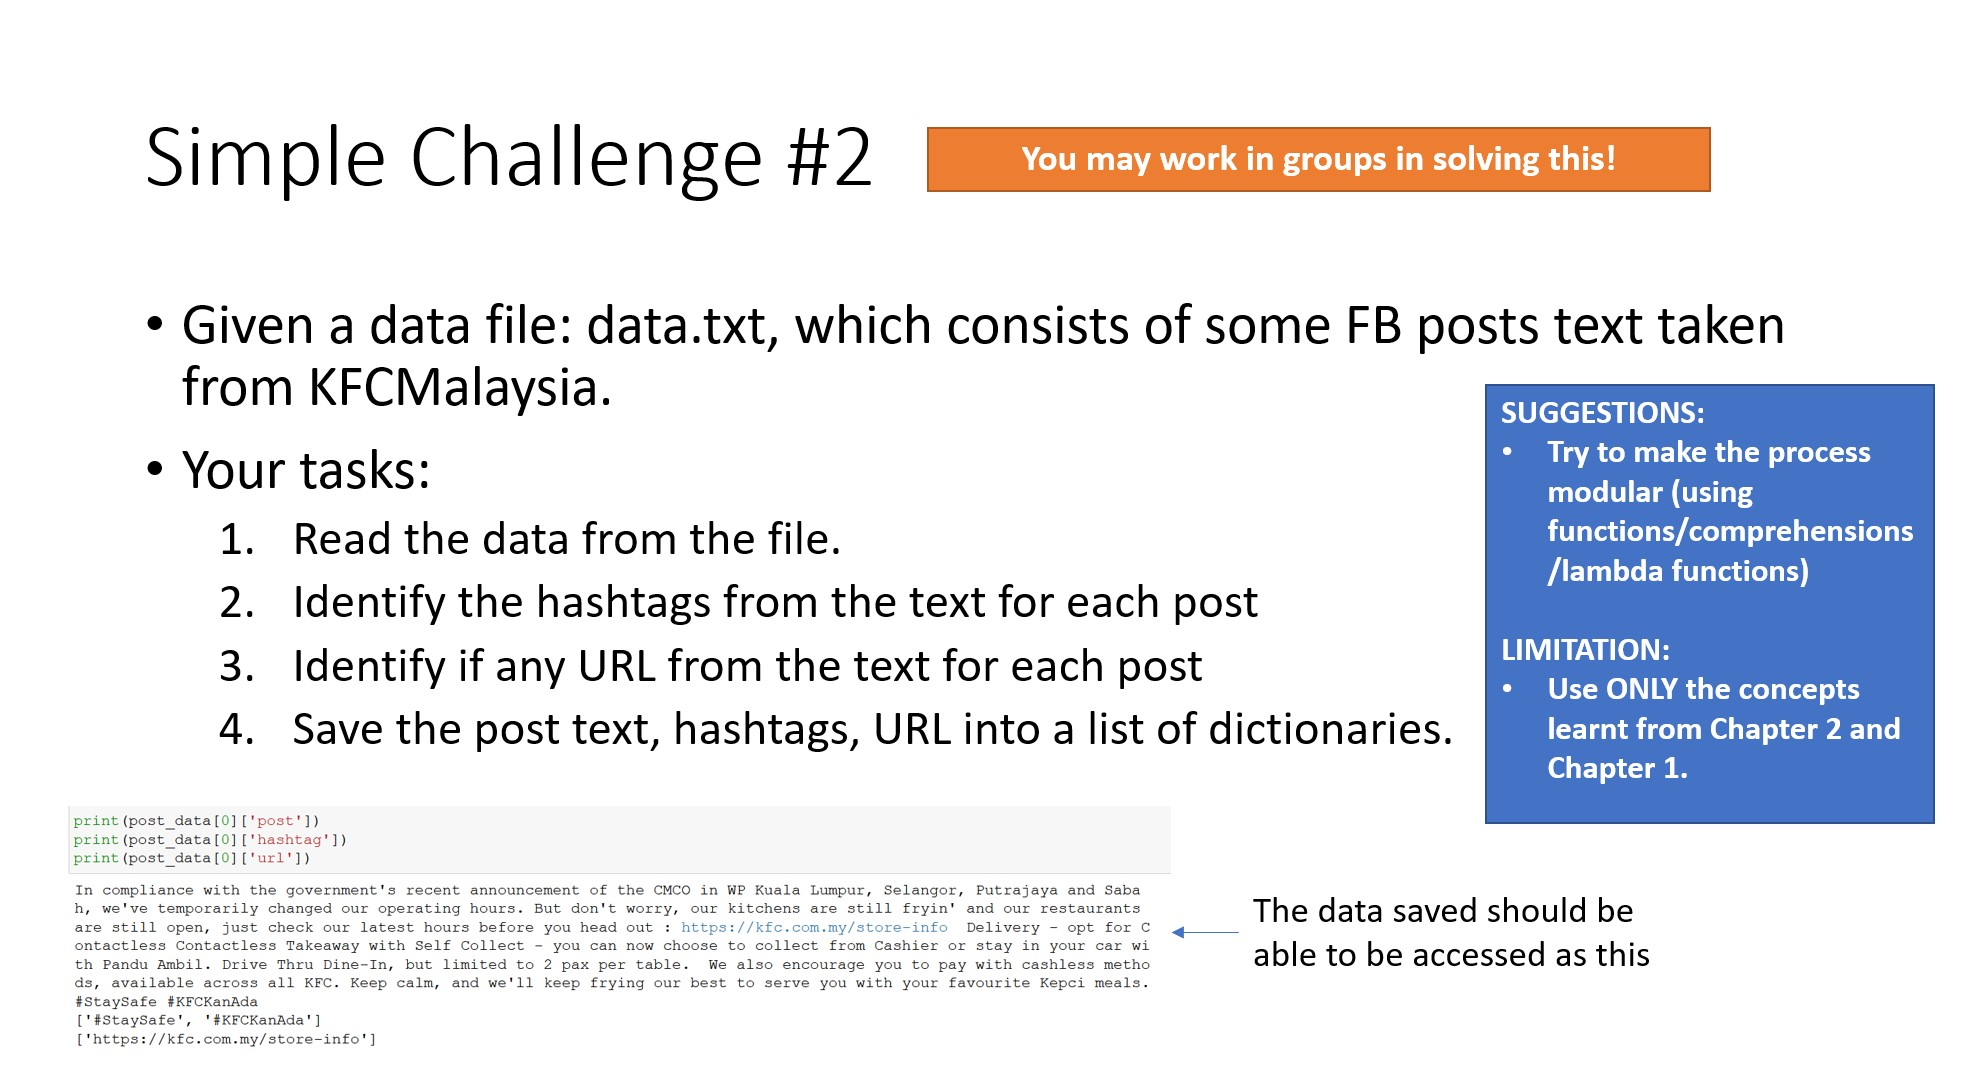
	</div>
	<p style="width: 50%;font-size:1.2rem;">
		In this challenge we are required to read the data.txt, which contains several (5 to be exact) post, extract and sort the information into a list of dictionary.<br>The dictionary will consist of 3 keys, namely post text, hash tag, and url. The challenge requires a modular and general solution using functions or comprehensions.
	</p>
</div>

🐈View On Github: https://go.midknight.co/vap



## Step 1: create the pattern recognition function

The idea of this function is to find the provided character. As the pattern may repeat a several times, we using the String.count() to get the character index of each appearence of the term. We will then read from the index until we reach a whitespace to extract the term we want.

Note: I <strong style="color:red;">did not</strong> use the bag of words approach (split all white spaces to get a list of words), as I think computationally it's more expensive. The mentioned approach will require 2 full search of the string *(? need justification)*:
1. Bagging the words
2. Enumerate the whole bag to determine if the word matches the searching pattern

My approach *(? possibly)* only requires one full search, which is the when String.count() function is called. The harvesting process of the word is conmpleted by continue reading character from the starting index until encoutered a white space.

In [4]:
def recognize(string,pattern):
    patternOccurence = string.count(pattern) #we want to know how many 'terms' exist
    start = 0
    results = []
    for i in range(0,patternOccurence):
        index = string.index(pattern, start)
        resultString = '';
        for j in range(index, len(string)):
            if string[j] == ' ':
                break
            else:
                resultString = resultString + string[j]
        results.append(resultString)
        start = index + 1
    return results

## Step 2: create the read file function

In [5]:
def readFile(filename,operation):
    f = open(filename,operation)
    lines = [ line[:-3] for line in f.readlines()]  ## To remove the unwanted '/n' newline character
    return lines

In [6]:
import json

## using comprehension to sort each stuff into a list of dictionary 📑
cleansed = [{'postText':post,'hashTag':recognize(post,'#'),'url':recognize(post,'https://')} for post in readFile('data.txt','r')]

# ## dumping results into a json file 🎊
# with open('result.json', 'w') as fp:
#     json.dump(cleansed, fp)

print(json.dumps(cleansed,sort_keys=True,indent=4)) # I don't know, just printing it out with print() just is not appealing for me

[
    {
        "hashTag": [
            "#StaySafe",
            "#KFCKanA"
        ],
        "postText": "In compliance with the government's recent announcement of the CMCO in WP Kuala Lumpur, Selangor, Putrajaya and Sabah, we've temporarily changed our operating hours. But don't worry, our kitchens are still fryin' and our restaurants are still open, just check our latest hours before you head out : https://kfc.com.my/store-info  Delivery - opt for Contactless Contactless Takeaway with Self Collect - you can now choose to collect from Cashier or stay in your car with Pandu Ambil. Drive Thru Dine-In, but limited to 2 pax per table.  We also encourage you to pay with cashless methods, available across all KFC. Keep calm, and we'll keep frying our best to serve you with your favourite Kepci meals.  #StaySafe #KFCKanA",
        "url": [
            "https://kfc.com.my/store-info"
        ]
    },
    {
        "hashTag": [
            "#RupaWan",
            "#JiwangWan",
            